# Detect face emotions

# Import Modules

In [16]:
import tensorflow
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Flatten, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Required Dataset

In [26]:
FILE_PATH =  r'D:\Emotion detection\images'
class_list = ['angry','digust','fear','happy','netural', 'sad','suprise']
datagen_train = ImageDataGenerator(rotation_range =10, height_shift_range = 0.5, width_shift_range = 0.5, horizontal_flip= True,
                       zoom_range = 0.05,shear_range = 0.05, rescale = 1./255)

train_batch = datagen_train.flow_from_directory(directory = FILE_PATH + '/train', target_size = (48,48),
                                      classes= class_list, batch_size = 20, color_mode = 'grayscale')
                                      
datagen_validation = ImageDataGenerator(rotation_range =10, height_shift_range = 0.5, width_shift_range = 0.5, horizontal_flip= True,
                       zoom_range = 0.05,shear_range = 0.05, rescale = 1./255)


validation_batch = datagen_validation.flow_from_directory(directory = FILE_PATH + '/validation', target_size = (48,48),
                                      classes= class_list, batch_size = 20, color_mode = 'grayscale')    


Found 0 images belonging to 7 classes.
Found 0 images belonging to 7 classes.


# Architecture

In [21]:
model = Sequential([
    Conv2D (32, (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same',input_shape = (48,48,1)),
    BatchNormalization(),
    
    Conv2D (32, (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same',input_shape = (48,48,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2), strides = 2),
    
    Conv2D (64, (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same',input_shape = (48,48,1)),
    BatchNormalization(),
    Conv2D (64, (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same',input_shape = (48,48,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2), strides = 2),
    
    Conv2D (128, (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same',input_shape = (48,48,1)),
    BatchNormalization(),
    Conv2D (128, (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same',input_shape = (48,48,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2), strides = 2),
    
    Conv2D (256, (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same',input_shape = (48,48,1)),
    BatchNormalization(),
    Conv2D (256, (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same',input_shape = (48,48,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2), strides = 2),
    
    Flatten(),
    Dense(200, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.6),
    
    Dense(64, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.6),
    
    Dense(7, activation = 'softmax')
    
    ])

# Compilation

In [22]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])


# Training

In [23]:
model.fit(train_batch, validation_data = validation_batch , epochs = 30, verbose = 1)

ValueError: ignored

In [15]:
haar_cascade = cv2.CascadeClassifier(r'C:\Users\dell\OneDrive\Desktop\model.xml')

# Testing though webcam

In [12]:
capture = cv2.VideoCapture(0)
while True:
    istrue,img_col = capture.read()
    img_col = cv2.flip(img_col,1)
    img = cv2.cvtColor(img_col,cv2.COLOR_BGR2GRAY)
    face_rect = haar_cascade.detectMultiScale(img,1.1,5)
    for x,y,w,h in face_rect:
        img_col = cv2.rectangle(img_col,(x,y),(x+w,y+h),255,2)
        img_crop = img[y:y+h,x:x+w]
        img_crop = cv2.resize(img_crop,(48,48),interpolation = cv2.INTER_CUBIC)
        img_crop = img_crop.reshape(1,48,48,1)
        prediction = model.predict(img_crop)
        prediction = np.argmax(prediction)
        cv2.putText(img_col,f'{class_list[prediction]}',(20,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2 )
    cv2.imshow('image',img_col)
    if cv2.waitKey(20) & 0xFF== ord('q'):
        break
capture.release()
cv2.destroyAllWindows()

error: ignored

# Testing though images

In [13]:
img = cv2.imread(r'D:\Emotion detection\images2\download (5).jpg',0)
face_rect = haar_cascade.detectMultiScale(img,1.1,3)
for x,y,w,h in face_rect:
    img_crop = img[y:y+h,x:x+w]
    img_crop = cv2.resize(img_crop,(48,48),interpolation = cv2.INTER_CUBIC)
    img_crop = img_crop.reshape(1,48,48,1)
    prediction = model.predict(img_crop)
    prediction = np.argmax(prediction)
print(class_list[prediction])
        
image = plt.imread(r'D:\Emotion detection\images2\download (5).jpg')
plt.imshow(image)
plt.show()

error: ignored

angry


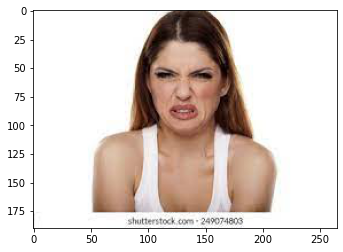

In [ ]:
img = cv2.imread(r'D:\Emotion detection\images2\download (9).jpg',0)
face_rect = haar_cascade.detectMultiScale(img,1.1,3)
for x,y,w,h in face_rect:
    img_crop = img[y:y+h,x:x+w]
    img_crop = cv2.resize(img_crop,(48,48),interpolation = cv2.INTER_CUBIC)
    img_crop = img_crop.reshape(1,48,48,1)
    prediction = model.predict(img_crop)
    prediction = np.argmax(prediction)
print(class_list[prediction])
        
image = plt.imread(r'D:\Emotion detection\images2\download (9).jpg')
plt.imshow(image)
plt.show()

In [24]:
img = cv2.imread(r'D:\Emotion detection\images2\download (3).jpg',0)
face_rect = haar_cascade.detectMultiScale(img,1.1,3)
for x,y,w,h in face_rect:
    img_crop = img[y:y+h,x:x+w]
    img_crop = cv2.resize(img_crop,(48,48),interpolation = cv2.INTER_CUBIC)
    img_crop = img_crop.reshape(1,48,48,1)
    prediction = model.predict(img_crop)
    prediction = np.argmax(prediction)
print(class_list[prediction])
        
image = plt.imread(r'D:\Emotion detection\images2\download (3).jpg')
plt.imshow(image)
plt.show()

error: ignored

In [25]:
img = cv2.imread(r'D:\Emotion detection\images2\download (6).jpg',0)
face_rect = haar_cascade.detectMultiScale(img,1.1,3)
for x,y,w,h in face_rect:
    img_crop = img[y:y+h,x:x+w]
    img_crop = cv2.resize(img_crop,(48,48),interpolation = cv2.INTER_CUBIC)
    img_crop = img_crop.reshape(1,48,48,1)
    prediction = model.predict(img_crop)
    prediction = np.argmax(prediction)
print(class_list[prediction])
        
image = plt.imread(r'D:\Emotion detection\images2\download (6).jpg')
plt.imshow(image)
plt.show()

error: ignored

fear


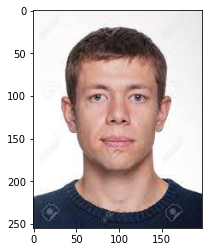

In [ ]:
img = cv2.imread(r'D:\Emotion detection\images2\download (7).jpg',0)
face_rect = haar_cascade.detectMultiScale(img,1.1,3)
for x,y,w,h in face_rect:
    img_crop = img[y:y+h,x:x+w]
    img_crop = cv2.resize(img_crop,(48,48),interpolation = cv2.INTER_CUBIC)
    img_crop = img_crop.reshape(1,48,48,1)
    prediction = model.predict(img_crop)
    prediction = np.argmax(prediction)
print(class_list[prediction])
        
image = plt.imread(r'D:\Emotion detection\images2\download (7).jpg')
plt.imshow(image)
plt.show()

happy


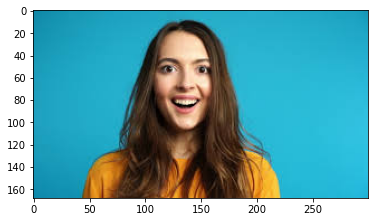

In [ ]:
img = cv2.imread(r'D:\Emotion detection\images2\images (5).jpg',0)
face_rect = haar_cascade.detectMultiScale(img,1.1,3)
for x,y,w,h in face_rect:
    img_crop = img[y:y+h,x:x+w]
    img_crop = cv2.resize(img_crop,(48,48),interpolation = cv2.INTER_CUBIC)
    img_crop = img_crop.reshape(1,48,48,1)
    prediction = model.predict(img_crop)
    prediction = np.argmax(prediction)
print(class_list[prediction])
        
image = plt.imread(r'D:\Emotion detection\images2\images (5).jpg')
plt.imshow(image)
plt.show()

fear


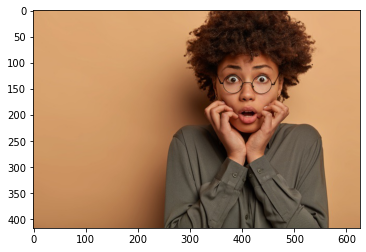

In [ ]:
img = cv2.imread(r'D:\Emotion detection\images2\download (12).jpg',0)
face_rect = haar_cascade.detectMultiScale(img,1.1,3)
for x,y,w,h in face_rect:
    img_crop = img[y:y+h,x:x+w]
    img_crop = cv2.resize(img_crop,(48,48),interpolation = cv2.INTER_CUBIC)
    img_crop = img_crop.reshape(1,48,48,1)
    prediction = model.predict(img_crop)
    prediction = np.argmax(prediction)
print(class_list[prediction])
        
image = plt.imread(r'D:\Emotion detection\images2\download (12).jpg')
plt.imshow(image)
plt.show()

In [ ]:
model.save(r'D:\Emotion detection\face detection model.h5')

# Thank you !!!